# COVID-19 plots
The purpose of this notebook is to plot the progression of COVID-19 cases based upon the New York Times' daily updated database. See https://github.com/nytimes/covid-19-data for more details on that database. Note data are stored by state and by county. Plots are linear-log, in order to capture the exponential growth of COVID-19, and perhaps more easily visualize when this growth is no longer exponential. 

Kirk Knobelspiesse, knobelspiesse@gmail.com

## Setup

In [1]:
import numpy as np
import pandas as pd
print('Using pandas version ',pd.__version__)
%matplotlib inline

# Only 10 rows of data will be displayed
pd.set_option("max_rows", 10) 

# Print floating point numbers using fixed point notation
np.set_printoptions(suppress=True)

# Set figure size
LARGE_FIGSIZE = (8, 6)
#from seaborn import set_style
#set_style("darkgrid")
import seaborn as sns
sns.set(style='ticks', context='talk')
import matplotlib.pyplot as plt
from datetime import datetime

Using pandas version  0.25.3


## Get data

In [2]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/"
filename_states = "us-states.csv"
filename_counties="us-counties.csv"
stt = pd.read_csv(url+filename_states, skiprows=2, names=["date","state","fips","cases","deaths"])
cyt = pd.read_csv(url+filename_counties, skiprows=2, names=["date","county","state","fips","cases","deaths"])


In [3]:
cyt

,date,county,state,fips,cases,deaths
0,2020-01-22,Snohomish,Washington,53061.0,1,0
1,2020-01-23,Snohomish,Washington,53061.0,1,0
2,2020-01-24,Cook,Illinois,17031.0,1,0
3,2020-01-24,Snohomish,Washington,53061.0,1,0
4,2020-01-25,Orange,California,6059.0,1,0
...,...,...,...,...,...,...
72982,2020-04-19,Sublette,Wyoming,56035.0,1,0
72983,2020-04-19,Sweetwater,Wyoming,56037.0,10,0
72984,2020-04-19,Teton,Wyoming,56039.0,62,0
72985,2020-04-19,Uinta,Wyoming,56041.0,6,0


/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


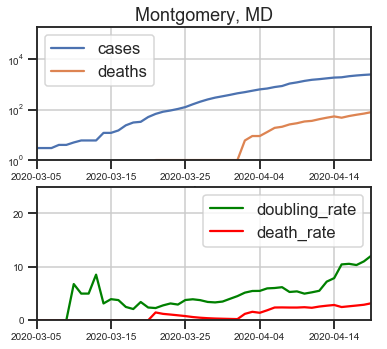

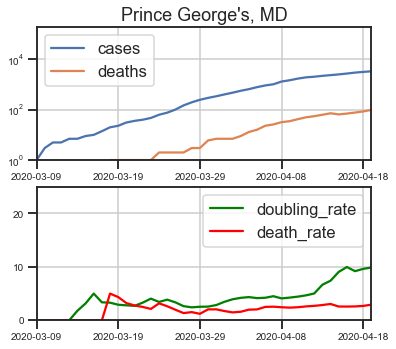

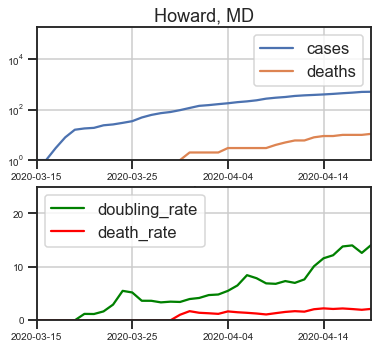

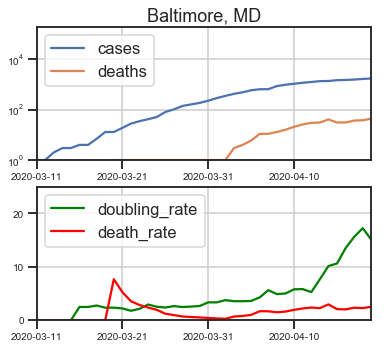

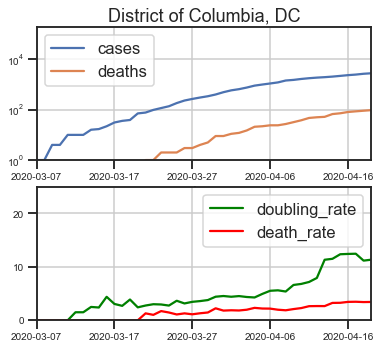

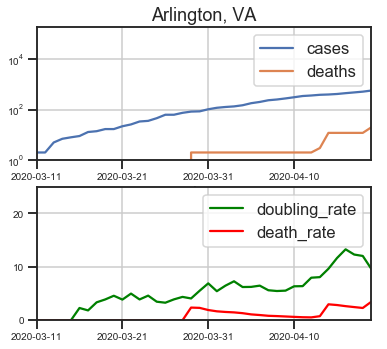

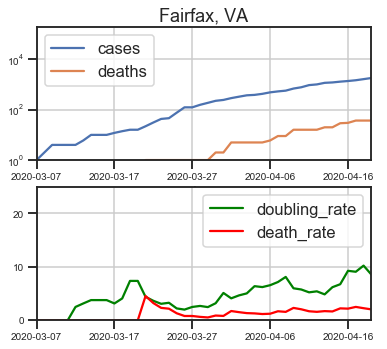

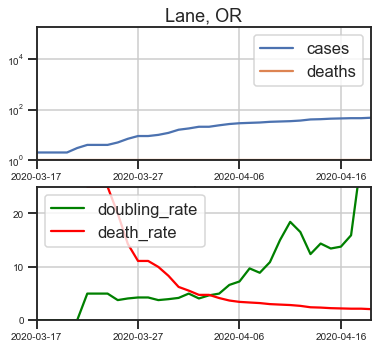

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


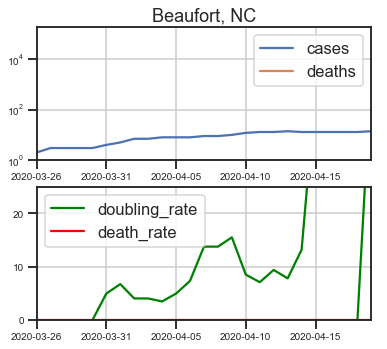

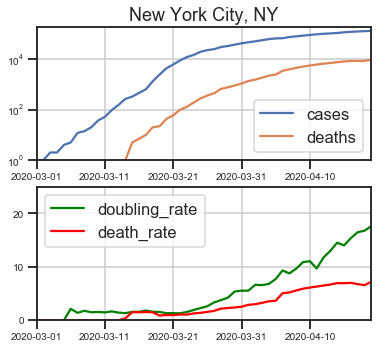

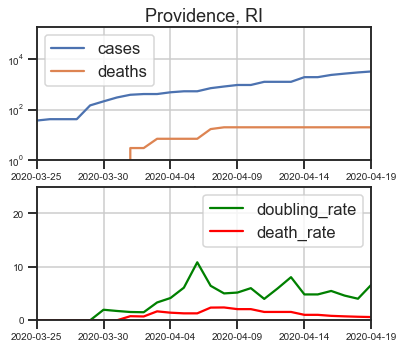

In [7]:
this_county=["Montgomery","Prince George's","Howard","Baltimore","District of Columbia","Arlington","Fairfax",\
            "Lane","Beaufort","New York City","Providence"]
this_state=["Maryland","Maryland","Maryland","Maryland","District of Columbia","Virginia","Virginia",\
            "Oregon", "North Carolina","New York","Rhode Island"]
this_state_short=["MD","MD","MD","MD","DC","VA","VA","OR","NC","NY","RI"]



yr=[1,200000]
fs=10
days_passed=5

for i in range(0,len(this_state)):
    this=cyt[(cyt.state==this_state[i]) & (cyt.county==this_county[i])]
    tt=this.cases.to_numpy(copy=True)
    r_tt=np.roll(tt,days_passed)
    doubling_rate= (days_passed*np.log(2.))/(np.log(tt/r_tt))
    doubling_rate[np.argwhere(doubling_rate<0)]=0
    this['doubling_rate']=doubling_rate
    
    dr=100*this.deaths.to_numpy(copy=True) / this.cases.to_numpy(copy=True)
    this['death_rate']=dr
    
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6,6))
    this_name=this_county[i]+", "+this_state_short[i]
    this.plot('date',['cases','deaths'],kind = 'line',title=this_name,
              fontsize=fs,logy=True,ylim=yr,ax=axes[0],grid=True)
    this.plot('date',['doubling_rate','death_rate'],kind = 'line',color=['green','red'],
          fontsize=fs,logy=False,ylim=[0,25],ax=axes[1],grid=True)
    this_savename="CV19_county_"+this_county[i].replace(" ", "")+".pdf"
    
    if (i == 0) : mont=this
    
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel("")
    plt.savefig(this_savename)
    plt.show()
    plt.close()
    
    

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


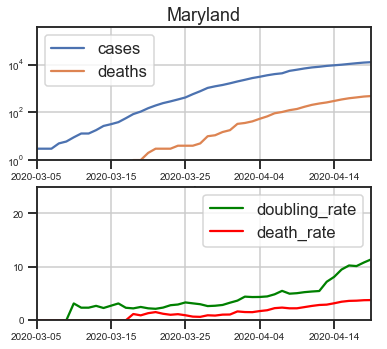

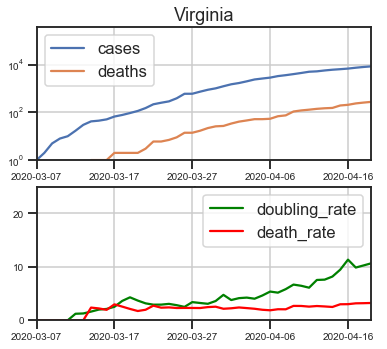

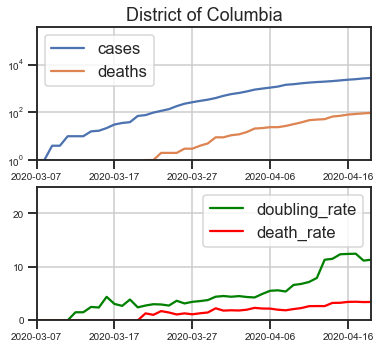

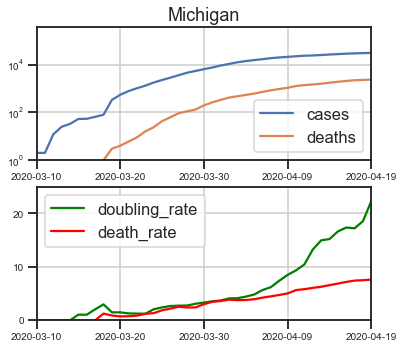

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


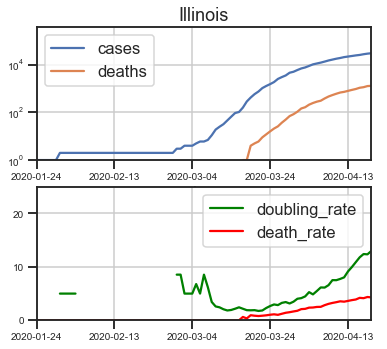

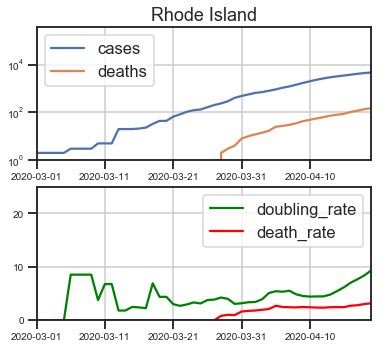

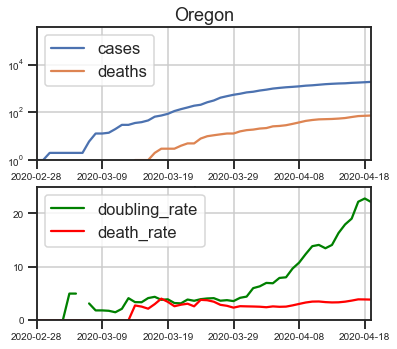

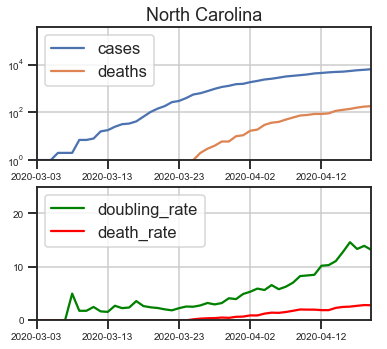

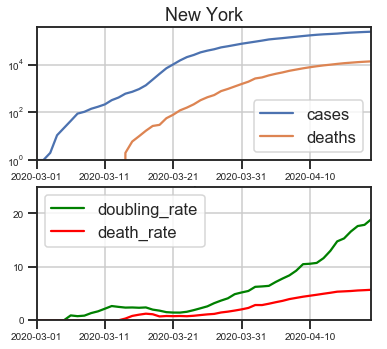

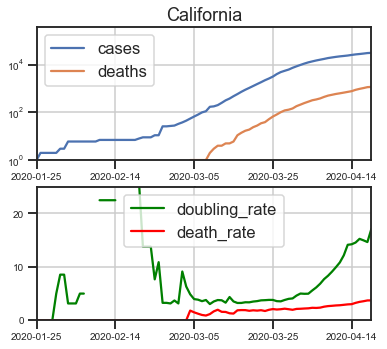

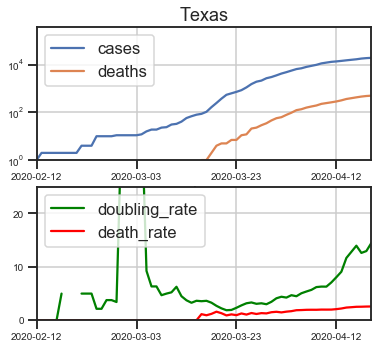

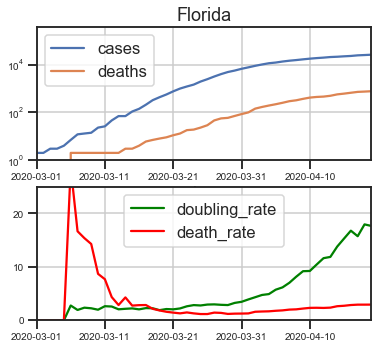

In [5]:

this_state=["Maryland","Virginia","District of Columbia","Michigan","Illinois","Rhode Island",\
            "Oregon", "North Carolina","New York","California","Texas","Florida"]


#fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16,10))
yr=[1,400000]
fs=10
days_passed=5

for i in range(0,len(this_state)):
    this=stt[stt.state==this_state[i]]
    tt=this.cases.to_numpy(copy=True)
    r_tt=np.roll(tt,days_passed)
    doubling_rate= (days_passed*np.log(2.))/(np.log(tt/r_tt))
    doubling_rate[np.argwhere(doubling_rate<0)]=0
    this['doubling_rate']=doubling_rate
    dr=100*this.deaths.to_numpy(copy=True) / this.cases.to_numpy(copy=True)
    this['death_rate']=dr
    
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6,6))
    this.plot('date',['cases','deaths'],kind = 'line',title=this_state[i],
              fontsize=fs,logy=True,ylim=yr,ax=axes[0],grid=True)
    this.plot('date',['doubling_rate','death_rate'],kind = 'line',color=['green','red'],
          fontsize=fs,logy=False,ylim=[0,25],ax=axes[1],grid=True)
    this_savename="CV19_state_"+this_state[i].replace(" ", "")+".pdf"
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel("")
    plt.savefig(this_savename)
    plt.show()
    plt.close()
    
    

In [15]:
cases=mont.cases.to_numpy(copy=True)
r_cases=np.roll(cases,1)
mont['new_cases']=cases-r_cases

deaths=mont.deaths.to_numpy(copy=True)
r_deaths=np.roll(deaths,1)
mont['new_deaths']=deaths-r_deaths

pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
mont


/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,date,county,state,fips,cases,deaths,doubling_rate,death_rate,new_cases,new_deaths
554,2020-03-05,Montgomery,Maryland,24031.0,3,0,0.000000,0.000000,-2504,-80
614,2020-03-06,Montgomery,Maryland,24031.0,3,0,0.000000,0.000000,0,0
699,2020-03-07,Montgomery,Maryland,24031.0,3,0,0.000000,0.000000,0,0
801,2020-03-08,Montgomery,Maryland,24031.0,4,0,0.000000,0.000000,1,0
924,2020-03-09,Montgomery,Maryland,24031.0,4,0,0.000000,0.000000,0,0
1070,2020-03-10,Montgomery,Maryland,24031.0,5,0,6.784577,0.000000,1,0
1250,2020-03-11,Montgomery,Maryland,24031.0,6,0,5.000000,0.000000,1,0
1468,2020-03-12,Montgomery,Maryland,24031.0,6,0,5.000000,0.000000,0,0
1747,2020-03-13,Montgomery,Maryland,24031.0,6,0,8.547556,0.000000,0,0
2088,2020-03-14,Montgomery,Maryland,24031.0,12,0,3.154649,0.000000,6,0
